# "Dynamic Covid-19 Tracker"

- badges: false
- author: Anshuman Gupta

##### <center>Hello!, This is a dynamic version of the dashboard, it updates once daily!</center>
##### <center>Data source is https://www.covid19india.org/ </center>

In [1]:
#collapse

from datetime import datetime
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
import pytz
%matplotlib inline


dynamic_df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

dynamic_df.head()

ddf = dynamic_df[(dynamic_df.Status == "Confirmed")]

ddf

ddf1 = ddf.drop(columns = ["Status"])

ddf2 = dynamic_df[(dynamic_df.Status == "Deceased")]

ddf2 = ddf2.drop(columns = ["Status"])

ddf1["Date"] = ddf1["Date"].astype('datetime64[ns]')



update = dynamic_df.iloc[-1,0]
cases = ddf1.TT.sum()
new = ddf1.iloc[-1,1]
deaths = ddf2.TT.sum()

dnew = ddf2.iloc[-1,1]

overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''


html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [2]:
#hide_input
tz = pytz.timezone('Asia/Kolkata')
#now = datetime.now().time() # time object
now = datetime.now()
now = now.astimezone(tz)
print("This dashboard is last updated at (IST) =", now.strftime("%Y-%m-%d %H:%M"))

This dashboard is last updated at (IST) = 2021-05-31 02:11


In [3]:
#collapse
ch_total = ddf1.CH.sum()
ch_new = ddf1.iloc[-1,7]
mh_total = ddf1.MH.sum()
mh_new = ddf1.iloc[-1,23]
dl_total = ddf1.DL.sum()
dl_new = ddf1.iloc[-1,11]
firstdata = '''
<!-- #######  HTML!! #########-->
<p style="text-align: center;font-size:18px;">--Important Places--</p>
<p style="text-align: left;font-size:18px;">Total Cases (<span style="color: #ff0000;">New Cases</span>)</p>
<p style="text-align: left;font-size:18px;">Chandigarh (Hometown): {ch_total} (<span style="color: #ff0000;">+{ch_new}</span>)</p>
<p style="text-align: left;font-size:18px;">Delhi (Second Home): {dl_total} (<span style="color: #ff0000;">+{dl_new}</span>)</p>
<p style="text-align: left;font-size:18px;">Maharashtra (Just Because..): {mh_total} (<span style="color: #ff0000;">+{mh_new}</span>)</p>

'''
html = HTML(firstdata.format(ch_total=ch_total, ch_new = ch_new, mh_total = mh_total, mh_new = mh_new, dl_total = dl_total, dl_new = dl_new ))

display(html)

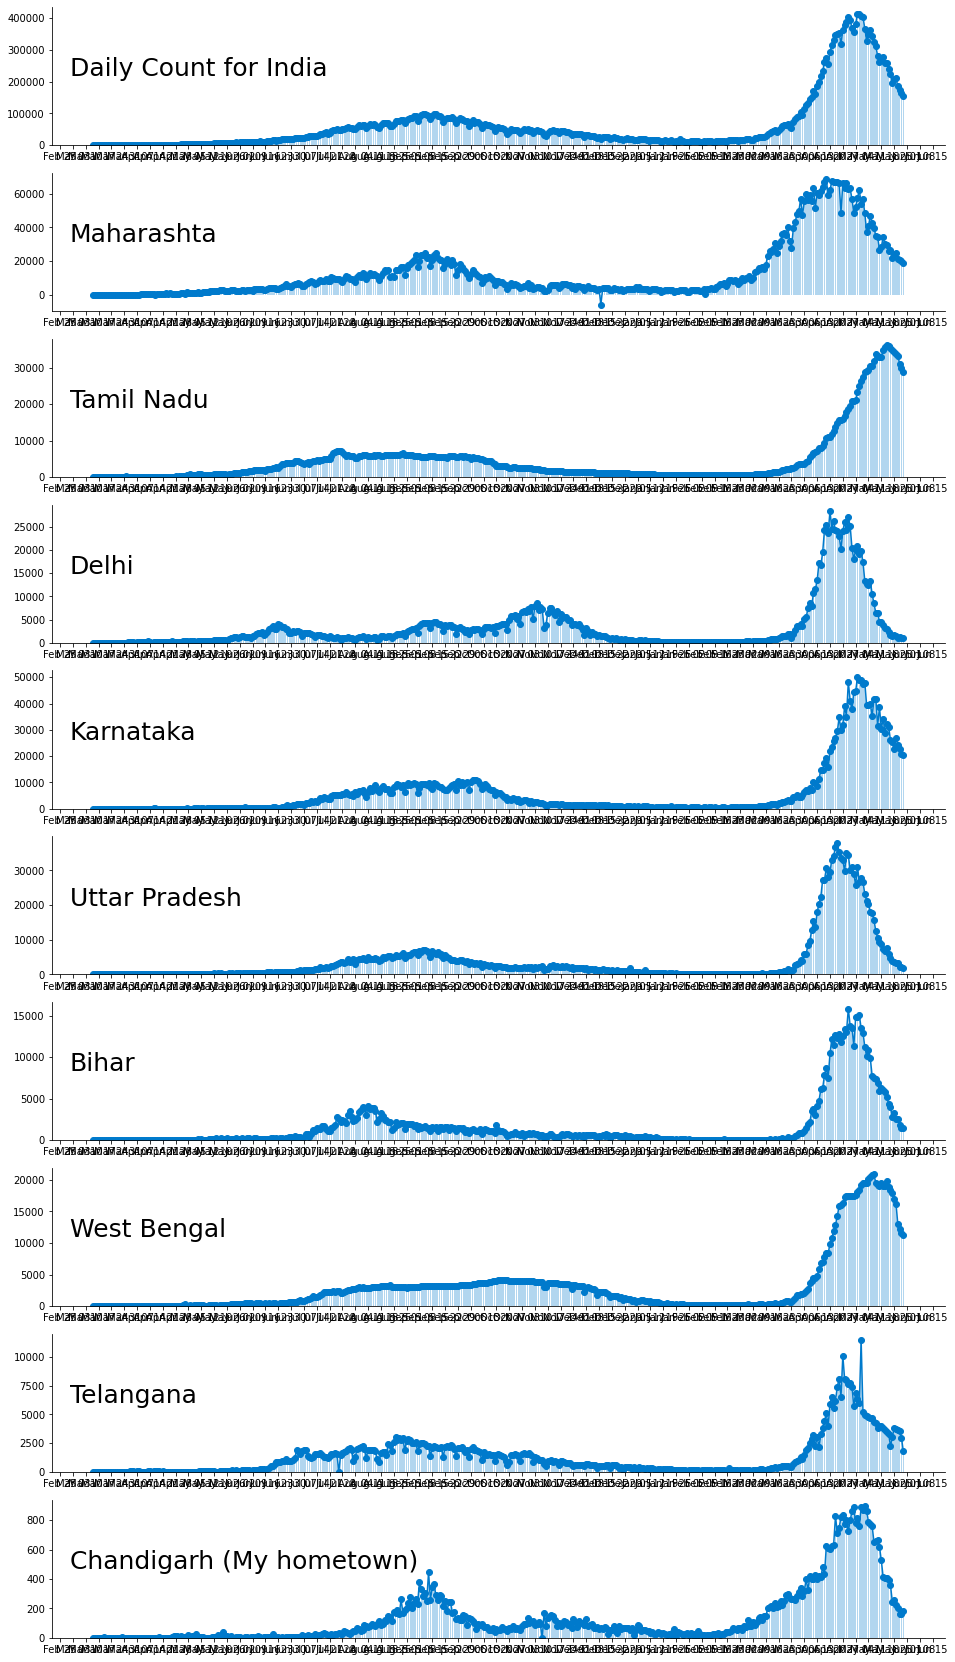

In [4]:
#collapse
n = 10

st = ["TT", "MH", "TN", "DL", "KA", "UP", "BR", "WB", "TG", "CH"]
st_name = ["Daily Count for India", "Maharashta", "Tamil Nadu", "Delhi", "Karnataka", "Uttar Pradesh", "Bihar", "West Bengal", "Telangana", "Chandigarh (My hometown)"]
ax = []
fig = plt.figure(figsize = (16,30))
gs = fig.add_gridspec(n, 3)

for i in range(n):
    ax1 = fig.add_subplot(gs[i, :])
    ax1.bar(ddf1.Date,ddf1[st[i]],alpha=0.3,color='#007acc')
    ax1.plot(ddf1.Date,ddf1[st[i]] , marker="o", color='#007acc')
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax1.text(0.02, 0.5,st_name[i], transform = ax1.transAxes, fontsize=25)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)